In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("orders.xlsx")
df.head()

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month
0,701-4488954-7529810,B07JKD1G9D,1,214.180,0.000,oneamz,151.890,36.580,51.670,25.700,A1UIZZ7LFTO1KV,2023-10-17,Canada,ontario,Strathroy,N7G3K9,214.180,2023-10
1,701-6897206-8231454,B077BYH5J5,1,83.650,0.000,oneamz,65.580,5.520,27.800,12.550,A3N3AP9DR5TZ9N,2023-10-17,Canada,Ontario,Mallorytown,K0E 1R0,83.650,2023-10
2,702-2583313-9907461,B08KDTK3XX,1,73.220,0.000,oneamz,50.640,10.130,29.330,12.450,A2NAHPBHVJDIV9,2023-10-17,Canada,Ontario,Brantford,N3T 0S2,73.220,2023-10
3,702-5629906-5703454,B0BFZZ9HGJ,1,205.320,0.000,oneamz,127.290,53.390,40.680,24.640,AJHEHDC6Y12XP,2023-10-17,Canada,Ontario,Kingston,K7L 0C1,205.320,2023-10
4,701-8202393-3049059,B088NG3XX3,1,147.650,0.000,oneamz,113.170,12.330,33.000,22.150,A7XHISNODKGL8,2023-10-17,Mexico,MEXICO,NAUCALPAN DE JUAREZ,53126,147.650,2023-10


In [5]:
df.head()

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month
0,701-4488954-7529810,B07JKD1G9D,1,214.180,0.000,oneamz,151.890,36.580,51.670,25.700,A1UIZZ7LFTO1KV,2023-10-17,Canada,ontario,Strathroy,N7G3K9,214.180,2023-10
1,701-6897206-8231454,B077BYH5J5,1,83.650,0.000,oneamz,65.580,5.520,27.800,12.550,A3N3AP9DR5TZ9N,2023-10-17,Canada,Ontario,Mallorytown,K0E 1R0,83.650,2023-10
2,702-2583313-9907461,B08KDTK3XX,1,73.220,0.000,oneamz,50.640,10.130,29.330,12.450,A2NAHPBHVJDIV9,2023-10-17,Canada,Ontario,Brantford,N3T 0S2,73.220,2023-10
3,702-5629906-5703454,B0BFZZ9HGJ,1,205.320,0.000,oneamz,127.290,53.390,40.680,24.640,AJHEHDC6Y12XP,2023-10-17,Canada,Ontario,Kingston,K7L 0C1,205.320,2023-10
4,701-8202393-3049059,B088NG3XX3,1,147.650,0.000,oneamz,113.170,12.330,33.000,22.150,A7XHISNODKGL8,2023-10-17,Mexico,MEXICO,NAUCALPAN DE JUAREZ,53126,147.650,2023-10


In [6]:
df.isnull().sum()

amazon_order_id                 0
asin                            0
quantity_ordered                0
unit_item_sale_price            8
unit_item_sale_tax              8
shipping_company            55527
total_cost                 119894
estimated_profit                8
shipping_fee               151881
amazon_fee                 220093
seller_id                       0
purchase_date                   0
country                         0
state                      223187
city                       223179
postal_code                223179
order_total_sales_price         0
year_month                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230914 entries, 0 to 230913
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   amazon_order_id          230914 non-null  object        
 1   asin                     230914 non-null  object        
 2   quantity_ordered         230914 non-null  int64         
 3   unit_item_sale_price     230906 non-null  float64       
 4   unit_item_sale_tax       230906 non-null  float64       
 5   shipping_company         175387 non-null  object        
 6   total_cost               111020 non-null  float64       
 7   estimated_profit         230906 non-null  float64       
 8   shipping_fee             79033 non-null   float64       
 9   amazon_fee               10821 non-null   float64       
 10  seller_id                230914 non-null  object        
 11  purchase_date            230914 non-null  datetime64[ns]
 12  country         

In [24]:
df.describe()

,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,total_cost,estimated_profit,shipping_fee,amazon_fee,order_total_sales_price,recency,min_recency,frequency,monetary
count,226827.000,226820.000,226820.000,111020.000,226820.000,79033.000,10820.000,226827.000,226827.000,226827.000,226827.000,226827.000
mean,1.098,108.120,0.878,100.788,13.947,32.635,32.682,110.569,566.197,395.696,3460.608,212053.931
std,0.626,173.608,6.108,140.223,27.335,38.770,35.631,176.656,337.588,284.659,6694.626,388112.114
min,0.000,0.010,0.000,0.010,-376.000,0.000,0.110,0.010,1.000,1.000,1.000,0.740
25%,1.000,33.340,0.000,29.650,3.870,10.270,13.900,34.125,275.000,181.000,77.000,8063.600
50%,1.000,54.120,0.000,54.630,6.468,26.650,23.130,55.870,563.000,316.000,313.000,33191.790
75%,1.000,109.190,0.000,112.430,13.528,37.480,39.320,112.300,789.000,584.000,1643.000,135934.390
max,99.000,6700.500,723.530,4212.880,2271.050,1283.050,659.760,7129.730,1558.000,1540.000,21736.000,1272257.640


-- **RFM analizi için kullanılması değerlendirilen sütunlar**

       - R(recemcy) : "purchase_date"
       - F(frequency) : "seller id" lere göre grup by yapılıp unique "amazon_order_id" sayısı hesaplanacak
       - M(monetary) : "total_cost", seller id lere göre gruplanıp total costları toplanacak.**

In [8]:
df[pd.isna(df["total_cost"])]

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month
26,701-5264690-2988203,B07PRQR38L,1,31.960,0.000,NaN,NaN,4.123,NaN,4.790,A3YS1AU2L1H89,2023-10-17,Canada,British Columbia,Vernon,V1H 1V1,31.960,2023-10
30,702-0566614-2936217,B07SD3WCHJ,1,66.790,0.000,NaN,NaN,8.616,NaN,10.020,ATOAC5BLUWFXA,2023-10-17,Canada,British Columbia,Vancouver,V5K 1S1,66.790,2023-10
71,701-4314310-4772203,B0C5X2F5W2,1,41.640,0.000,NaN,NaN,5.371,NaN,6.240,A3YS1AU2L1H89,2023-10-17,Canada,British Columbia,Vancouver,V6J 5L1,41.640,2023-10
75,702-2424217-2617046,B0B5NBP9PB,1,15.590,2.340,NaN,NaN,2.011,NaN,2.340,A7XHISNODKGL8,2023-10-17,Canada,Nova Scotia,Bedford,B4A 4B4,17.930,2023-10
123,702-6552496-9456266,B0BGKHR9J2,1,39.760,2.790,NaN,NaN,5.129,NaN,5.960,A3YS1AU2L1H89,2023-10-16,Canada,Manitoba,Teulon mb.,R0C 3B0,42.550,2023-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230909,702-8734032-5727446,B06Y5RHCM9,1,6.220,0.000,NaN,NaN,0.802,NaN,NaN,AYW39ZPKWHQVE,2017-09-19,Canada,NaN,NaN,NaN,26.030,2017-09
230910,702-7087689-8708254,B073RH6STN,1,6.580,0.000,NaN,NaN,0.849,NaN,NaN,AYW39ZPKWHQVE,2017-08-08,Canada,NaN,NaN,NaN,18.310,2017-08
230911,701-8676808-1866658,B01LZAMW9J,1,4.400,0.000,NaN,NaN,0.568,NaN,NaN,AIWAWTK4WOWKQ,2016-10-06,Canada,NaN,NaN,NaN,8.810,2016-10
230912,701-8676808-1866658,B01LYYZC2J,1,4.400,0.000,NaN,NaN,0.568,NaN,NaN,AIWAWTK4WOWKQ,2016-10-06,Canada,NaN,NaN,NaN,8.810,2016-10


In [9]:
df[pd.isna(df["total_cost"])]["purchase_date"].value_counts(dropna = False)
#total_cost un boş olmasının tarih ile bir ilişkisi olup olmadığına bakıldı. 

2021-11-27    659
2021-09-05    614
2021-09-22    537
2021-12-05    532
2021-09-04    510
             ... 
2018-07-14      1
2023-06-18      1
2018-04-04      1
2020-04-25      1
2018-05-11      1
Name: purchase_date, Length: 2061, dtype: int64

In [10]:
df[df['purchase_date'].dt.year == 2021][df['total_cost'].isna()]

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month
129437,701-5808312-6814602,B076QG7M31,1,41.030,0.000,amazon,NaN,5.293,NaN,NaN,A2JHIUU53D26N,2021-12-31,Canada,NaN,NaN,NaN,41.030,2021-12
129438,702-8911910-5504252,B09D9GDPS8,1,26.130,0.000,amazon,NaN,3.371,NaN,NaN,A3RVTWP4EHP5DE,2021-12-31,Canada,NaN,NaN,NaN,26.130,2021-12
129439,701-2419866-0969836,B08TB6VXFL,1,34.120,4.430,NaN,NaN,4.401,NaN,NaN,A35XF9QZ5BKLP9,2021-12-31,Canada,NaN,NaN,NaN,38.550,2021-12
129440,701-4033477-0835415,B07ZPNCQR5,1,248.180,0.000,oneamz,NaN,32.014,NaN,NaN,A3LFWJKL9610JM,2021-12-31,Mexico,NaN,NaN,NaN,248.180,2021-12
129441,702-2440230-0629811,B09F2V58HD,1,77.600,3.880,NaN,NaN,10.010,NaN,NaN,A35XF9QZ5BKLP9,2021-12-31,Canada,NaN,NaN,NaN,81.480,2021-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198303,702-1102618-1331417,B08B13GZG7,1,102.990,0.000,amazon,NaN,13.285,NaN,NaN,AP6PD1FDYSXEU,2021-01-01,Mexico,NaN,NaN,NaN,102.990,2021-01
198304,702-7258989-0022666,B084BLCLVS,1,183.310,0.000,NaN,NaN,23.646,NaN,NaN,AO91F3YY3MI87,2021-01-01,Canada,NaN,NaN,NaN,196.540,2021-01
198305,702-9498290-6401012,B07T6GBYDZ,1,44.570,0.000,amazon,NaN,5.749,NaN,NaN,A1BJ0L697EI7QA,2021-01-01,Mexico,NaN,NaN,NaN,44.570,2021-01
198306,701-8433266-6281818,B07QYVTPCJ,1,20.880,0.000,amazon,NaN,2.693,NaN,NaN,A1LJ1FZT9TYF8V,2021-01-01,Mexico,NaN,NaN,NaN,20.880,2021-01


In [11]:
df['purchase_date'].dt.year.value_counts()

2021    68871
2022    67919
2023    61518
2020    26513
2019     4140
2018     1774
2017      176
2016        3
Name: purchase_date, dtype: int64

In [12]:
df[pd.isna(df["total_cost"])]['purchase_date'].dt.year.value_counts(dropna = False)

2021    65318
2020    26513
2022    17996
2019     4140
2023     3974
2018     1774
2017      176
2016        3
Name: purchase_date, dtype: int64

**total_cost un 2022 yılından sonra daha düzenli tutulduğu görülmekte**

In [13]:
df['purchase_date'].max()

Timestamp('2023-10-17 00:00:00')

## Recency (Purchase Date)
* 28/10/2023 datanın çekildiği tarih

In [14]:
reference_date = pd.to_datetime('2023-10-18')
df['recency'] = (reference_date - df['purchase_date']).dt.days

In [15]:
df.sample(10)

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month,recency
27569,701-2984163-4758624,B07SMGQ18F,1,239.160,0.000,amazon,171.990,22.190,42.000,NaN,A2G3MG99NRR16Y,2023-05-08,Canada,NaN,NaN,NaN,239.160,2023-05,163
150686,702-4973001-1493043,B088MXQW9L,1,100.410,0.000,amazon,NaN,12.953,NaN,NaN,A2GL9054BSBDEB,2021-10-27,Canada,NaN,NaN,NaN,100.410,2021-10,721
89172,702-1148222-6908240,B08PBHQY37,1,45.230,0.000,amazon,17.510,4.880,NaN,NaN,ATHRUZKS0QD1Q,2022-08-18,Canada,NaN,NaN,NaN,45.230,2022-08,426
14542,701-0731273-0517866,B09Y4XNHVY,1,70.590,0.000,oneamz,42.770,15.410,27.860,NaN,A1XQN737BNKLJ,2023-07-16,Canada,NaN,NaN,NaN,70.590,2023-07,94
207738,702-9589256-3688242,B08G4W1CZM,1,100.850,0.000,NaN,NaN,13.009,NaN,NaN,A33UTJS724W2TL,2020-10-19,Canada,NaN,NaN,NaN,100.850,2020-10,1094
223446,702-8608069-9864214,B07B8M4JD1,1,73.530,0.000,NaN,NaN,9.485,NaN,NaN,A3FDNTDEAXBDMU,2020-05-04,Canada,NaN,NaN,NaN,77.600,2020-05,1262
39345,702-0334712-2125836,B005F6EIBG,1,122.060,0.000,oneamz,75.920,19.490,56.740,NaN,A37N2832L4AGT1,2023-03-28,Mexico,NaN,NaN,NaN,122.060,2023-03,204
113819,701-7904066-7538622,B07C3CLJWV,1,89.620,0.000,amazon,73.170,9.730,NaN,NaN,A2IPEDLNNKWGNK,2022-04-01,Canada,NaN,NaN,NaN,89.620,2022-04,565
190702,702-6096851-1558655,B000N4W2SG,1,28.640,0.000,NaN,NaN,3.694,NaN,NaN,A1TQ4DJY93DW9,2021-04-15,Canada,NaN,NaN,NaN,28.640,2021-04,916
43160,701-7889646-3566662,B07RTHXDDK,1,51.180,0.000,amazon,35.430,5.030,8.440,NaN,A2OKVVCQUP0CC0,2023-03-08,Mexico,NaN,NaN,NaN,51.180,2023-03,224


In [16]:
df["seller_id"].value_counts()

A2GL9054BSBDEB    21736
A1BJ0L697EI7QA    12710
ALO881YZXTIHY      7290
A35XF9QZ5BKLP9     4195
A2JJHYKAA2AQCV     3779
                  ...  
A3UPQYC3OZ8M8P        1
A1MGC4BGFPGCOW        1
A3KZN2X4JAPZ7X        1
A2C2HHBYZXYNAB        1
A20525VG4OHZOS        1
Name: seller_id, Length: 4439, dtype: int64

In [17]:
df['min_recency'] = df['seller_id'].map(df.groupby('seller_id')['recency'].min())
df.sample(10)

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month,recency,min_recency
106307,702-1586330-6173056,B09BQN4L47,1,44.540,0.000,amazon,NaN,5.746,NaN,NaN,A2GL9054BSBDEB,2022-05-12,Canada,NaN,NaN,NaN,44.540,2022-05,524,474
14756,702-7192381-0063450,B07LCYCKPF,1,0.740,0.100,NaN,NaN,0.095,NaN,NaN,A132T02RZ3L6PO,2023-07-14,Canada,NaN,NaN,NaN,0.830,2023-07,96,75
117503,701-9433557-1060257,B08HM91K2B,1,0.740,0.000,NaN,NaN,0.095,NaN,NaN,A1R6Q0R1YJ1SSX,2022-03-08,Canada,NaN,NaN,NaN,0.740,2022-03,589,558
20794,701-5259260-6829849,B0B875WWCZ,1,46.210,0.000,amazon,34.280,3.420,10.290,NaN,A17PO2AU4300A9,2023-06-05,Mexico,NaN,NaN,NaN,46.210,2023-06,135,128
37120,701-1017841-2358646,B09TPC2TP9,1,85.100,0.000,amazon,61.100,5.490,21.110,NaN,AY72DU2NCTDGN,2023-04-06,Mexico,NaN,NaN,NaN,85.100,2023-04,195,195
62824,701-0544889-3316223,B0BJ1M9W4N,1,26.010,0.000,amazon,18.910,1.890,8.920,NaN,A365BE4JDU36D,2022-12-27,Canada,NaN,NaN,NaN,26.010,2022-12,295,226
22696,702-3722798-4674612,B08YXNQFRW,1,53.210,0.000,oneamz,35.970,8.630,25.320,NaN,AN646EMNWJIZM,2023-05-29,Canada,NaN,NaN,NaN,53.210,2023-05,142,140
97186,702-7026817-3843445,B08V9229MD,1,25.940,0.000,amazon,20.440,1.430,NaN,NaN,A2HJPY7XZT2JSP,2022-06-26,Canada,NaN,NaN,NaN,25.940,2022-06,479,355
128246,701-7735564-6757841,B08QJ18Q8G,1,56.960,0.000,amazon,NaN,7.348,NaN,NaN,A15H1AQ3XGH5EV,2022-01-06,Canada,NaN,NaN,NaN,56.960,2022-01,650,241
112998,701-5791870-6350661,B07KCN81JK,1,35.430,0.000,NaN,NaN,4.570,NaN,NaN,A2ZXI0PKFGZQI4,2022-04-05,Canada,NaN,NaN,NaN,35.430,2022-04,561,558


In [18]:
df[df["seller_id"] == "A1B055MW2R21WH"]

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month,recency,min_recency
1173,702-0340953-1083415,B0BCVPLZSW,1,372.030,0.000,oneamz,237.700,61.090,120.430,NaN,A1B055MW2R21WH,2023-10-11,Mexico,Chihuahua,Chihuahua,31217,372.030,2023-10,7,7
3233,701-5747584-3386658,B0BPWRPPFX,1,194.340,0.000,oneamz,145.230,28.890,79.950,19.430,A1B055MW2R21WH,2023-10-02,Mexico,MEXICO,CIUDAD ADOLFO LOPEZ MATEOS,52938,194.340,2023-10,16,7
3465,702-6830349-6956256,B0C4Y258WL,1,129.230,0.000,oneamz,84.450,28.410,57.120,19.380,A1B055MW2R21WH,2023-10-01,Mexico,CIUDAD DE MEXICO,CIUDAD DE MEXICO,01710,129.230,2023-10,17,7
3708,702-2799404-7281823,B087JTY47V,1,606.800,0.000,oneamz,411.900,118.080,276.900,91.020,A1B055MW2R21WH,2023-09-29,Mexico,QUINTANA ROO,COZUMEL,77600,606.800,2023-09,19,7
3753,701-7855299-0818653,B0BPWRPPFX,1,195.570,0.000,oneamz,145.230,29.510,79.950,19.560,A1B055MW2R21WH,2023-09-29,Mexico,Ciudad de México,Mexico,01760,195.570,2023-09,19,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13936,701-0767676-4893853,B0BLYF98HS,1,341.070,23.880,oneamz,224.890,56.230,66.970,NaN,A1B055MW2R21WH,2023-07-20,Canada,NaN,NaN,NaN,364.940,2023-07,90,7
13966,701-5618898-2189805,B072FH2D5S,1,1304.960,0.000,oneamz,860.480,215.120,174.140,NaN,A1B055MW2R21WH,2023-07-20,Canada,NaN,NaN,NaN,1304.960,2023-07,90,7
14134,702-4747030-3417012,B0BJ8X61RY,1,578.390,0.000,oneamz,419.630,57.100,210.400,NaN,A1B055MW2R21WH,2023-07-18,Canada,NaN,NaN,NaN,578.390,2023-07,92,7
20203,702-8384950-9117834,B01B9U9HQM,1,1506.130,0.000,oneamz,998.530,224.350,39.980,NaN,A1B055MW2R21WH,2023-06-08,Canada,NaN,NaN,NaN,1506.130,2023-06,132,7


In [19]:
df[df["purchase_date"] < '2019-07-13'] # '2019-07-13' OneAMZ ilk register date i bu tarih bunun öncesi orderlar OneAMZ ile ilgili değil.

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month,recency,min_recency
226827,701-0456701-5965026,B07KBBR53P,1,132.920,0.000,NaN,NaN,17.146,NaN,NaN,A2TTOERAO17FVB,2019-07-12,Canada,NaN,NaN,NaN,132.920,2019-07,1559,623
226828,702-5831726-9705067,B07KMDTRTZ,1,29.190,0.000,NaN,NaN,3.765,NaN,NaN,A2JJHYKAA2AQCV,2019-07-12,Canada,NaN,NaN,NaN,29.190,2019-07,1559,534
226829,702-2586184-8913025,B0746DT737,1,80.730,0.000,NaN,NaN,10.414,NaN,NaN,A1DLOVGLFEOV8W,2019-07-12,Canada,NaN,NaN,NaN,92.420,2019-07,1559,684
226830,701-2913862-2566628,B00Y9Y8AIC,1,37.460,0.000,NaN,NaN,4.832,NaN,NaN,A3NHJHWBGCH6NU,2019-07-12,Canada,NaN,NaN,NaN,37.460,2019-07,1559,1147
226831,702-7046864-3981009,B07MVF27FT,1,19.240,0.000,NaN,NaN,2.482,NaN,NaN,A2JJHYKAA2AQCV,2019-07-12,Canada,NaN,NaN,NaN,19.240,2019-07,1559,534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230909,702-8734032-5727446,B06Y5RHCM9,1,6.220,0.000,NaN,NaN,0.802,NaN,NaN,AYW39ZPKWHQVE,2017-09-19,Canada,NaN,NaN,NaN,26.030,2017-09,2220,751
230910,702-7087689-8708254,B073RH6STN,1,6.580,0.000,NaN,NaN,0.849,NaN,NaN,AYW39ZPKWHQVE,2017-08-08,Canada,NaN,NaN,NaN,18.310,2017-08,2262,751
230911,701-8676808-1866658,B01LZAMW9J,1,4.400,0.000,NaN,NaN,0.568,NaN,NaN,AIWAWTK4WOWKQ,2016-10-06,Canada,NaN,NaN,NaN,8.810,2016-10,2568,720
230912,701-8676808-1866658,B01LYYZC2J,1,4.400,0.000,NaN,NaN,0.568,NaN,NaN,AIWAWTK4WOWKQ,2016-10-06,Canada,NaN,NaN,NaN,8.810,2016-10,2568,720


In [20]:
df = df[df["purchase_date"] >= '2019-07-13']

## Frequency

In [21]:
df["frequency"] = df["seller_id"].map(df.groupby("seller_id")["amazon_order_id"].count())
df.sample(10)

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month,recency,min_recency,frequency
131177,702-8192053-0189838,B09CLDG77V,1,48.900,0.000,amazon,NaN,6.308,NaN,NaN,A3O6O7V4B7YTHY,2021-12-24,Canada,NaN,NaN,NaN,48.900,2021-12,663,580,156
6153,702-9493801-2717800,B09TKP6M2T,1,256.980,0.000,oneamz,196.160,30.880,50.000,38.550,A22B9994535ZJR,2023-09-16,Mexico,GUANAJUATO,SAN LUIS DE LA PAZ,37900,256.980,2023-09,32,2,55
209726,702-4949320-4126646,B07Y4S5796,1,42.890,0.000,amazon,NaN,5.533,NaN,NaN,A38YGZ07L7P5EZ,2020-10-01,Canada,NaN,NaN,NaN,42.890,2020-10,1112,846,460
107913,702-0822073-1234665,B09XM525LY,1,46.470,0.000,amazon,32.100,6.420,NaN,NaN,A4QXA98EYHH1A,2022-05-02,Canada,NaN,NaN,NaN,46.470,2022-05,534,315,218
193941,701-0644086-0522647,B06XR8WZX6,1,70.080,0.000,amazon,NaN,9.040,NaN,NaN,A1BJ0L697EI7QA,2021-02-27,Canada,NaN,NaN,NaN,70.080,2021-02,963,277,12710
188603,702-2170843-4481831,B00BBJS2KY,1,29.160,0.000,NaN,NaN,3.762,NaN,NaN,ALO881YZXTIHY,2021-05-05,Canada,NaN,NaN,NaN,29.160,2021-05,896,694,7290
42972,702-3336821-1118654,B0746SVR2N,1,760.300,0.000,oneamz,484.700,121.170,244.810,NaN,A3E5ZLS43VP1QI,2023-03-09,Mexico,NaN,NaN,NaN,760.300,2023-03,223,220,20
214812,701-7956141-3622602,B07QK43L8B,1,150.200,0.000,NaN,NaN,19.375,NaN,NaN,A2GL9054BSBDEB,2020-09-09,Canada,NaN,NaN,NaN,150.200,2020-09,1134,474,21736
206512,701-7458633-7014668,B076KBP6WY,1,27.590,0.000,amazon,NaN,3.559,NaN,NaN,A14HCSESIGVYWM,2020-10-30,Mexico,NaN,NaN,NaN,27.590,2020-10,1083,911,1643
40455,701-9733356-3869854,B0BWGK1NPD,1,314.650,0.000,oneamz,199.900,49.980,39.980,NaN,APS9H48CITHKA,2023-03-22,Canada,NaN,NaN,NaN,340.310,2023-03,210,210,13


In [22]:
df[df["seller_id"] == "AP3T1LCFO69TI"]

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month,recency,min_recency,frequency
91156,701-0340720-1237842,B016OK3MK4,1,238.990,0.000,oneamz,147.140,21.160,NaN,NaN,AP3T1LCFO69TI,2022-08-04,Mexico,NaN,NaN,NaN,238.990,2022-08,440,440,199
91220,701-0905850-3397047,B09TYY2GSH,1,113.580,0.000,amazon,67.620,11.950,NaN,NaN,AP3T1LCFO69TI,2022-08-04,Mexico,NaN,NaN,NaN,113.580,2022-08,440,440,199
91335,701-4842780-6793826,B08CXVH154,1,113.720,0.000,oneamz,69.910,8.380,NaN,NaN,AP3T1LCFO69TI,2022-08-03,Mexico,NaN,NaN,NaN,113.720,2022-08,441,440,199
91461,702-7521919-6193007,B01IFG7OEA,5,866.430,0.000,oneamz,530.050,85.550,NaN,NaN,AP3T1LCFO69TI,2022-08-02,Mexico,NaN,NaN,NaN,866.430,2022-08,442,440,199
91500,701-7939444-3234653,B00F9A4FJI,1,116.830,0.000,amazon,98.190,11.790,NaN,NaN,AP3T1LCFO69TI,2022-08-02,Canada,NaN,NaN,NaN,116.830,2022-08,442,440,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113911,701-4282737-6452239,B011IH6MBO,1,1084.020,0.000,oneamz,556.920,190.530,NaN,NaN,AP3T1LCFO69TI,2022-03-31,Mexico,NaN,NaN,NaN,1084.020,2022-03,566,440,199
114419,701-5860692-0592266,B08FBWZSJJ,1,51.210,0.000,amazon,35.650,8.910,NaN,NaN,AP3T1LCFO69TI,2022-03-28,Canada,NaN,NaN,NaN,51.210,2022-03,569,440,199
115737,702-6606985-4256236,B08F7FCFY1,1,515.290,0.000,oneamz,NaN,66.471,NaN,NaN,AP3T1LCFO69TI,2022-03-21,Canada,NaN,NaN,NaN,515.290,2022-03,576,440,199
119314,702-6168366-7497037,B07S7Q19ZL,3,631.060,0.000,oneamz,NaN,81.405,NaN,NaN,AP3T1LCFO69TI,2022-02-24,Mexico,NaN,NaN,NaN,631.060,2022-02,601,440,199


## Monetary

In [23]:
df["monetary"] = df["seller_id"].map(df.groupby("seller_id")["unit_item_sale_price"].sum())
df.sample(10)

,amazon_order_id,asin,quantity_ordered,unit_item_sale_price,unit_item_sale_tax,shipping_company,total_cost,estimated_profit,shipping_fee,amazon_fee,seller_id,purchase_date,country,state,city,postal_code,order_total_sales_price,year_month,recency,min_recency,frequency,monetary
47366,702-2943581-9217826,B08TSSGGF1,1,37.060,0.000,amazon,23.260,6.820,9.290,NaN,A1R6YL7HDJT5Q2,2023-02-15,Canada,NaN,NaN,NaN,37.060,2023-02,245,230,193,10266.730
188281,702-6303274-1570612,B01LEK86PA,1,39.550,0.000,amazon,NaN,5.102,NaN,NaN,A1BJ0L697EI7QA,2021-05-09,Canada,NaN,NaN,NaN,39.550,2021-05,892,277,12710,750858.380
47477,701-5832316-8169006,B09P51TXGG,1,155.440,0.000,oneamz,109.610,10.700,47.250,NaN,A1DZ105INUZ8US,2023-02-15,Mexico,NaN,NaN,NaN,155.440,2023-02,245,202,39,4109.020
19209,701-3458331-2628239,B07RW8PQG1,1,31.060,0.000,amazon,23.410,2.400,9.430,NaN,AXNZ2OYGONEM1,2023-06-14,Mexico,NaN,NaN,NaN,31.060,2023-06,126,104,23,2397.580
143100,701-0253313-9147470,B08BKHDLJV,1,69.930,0.000,amazon,NaN,9.021,NaN,NaN,A1BJ0L697EI7QA,2021-11-17,Canada,NaN,NaN,NaN,69.930,2021-11,700,277,12710,750858.380
110439,701-4371142-0717043,B09GXBHF49,1,119.930,0.000,amazon,104.790,5.240,NaN,NaN,A217MEMKKDPAMX,2022-04-18,Canada,NaN,NaN,NaN,119.930,2022-04,548,544,30,3061.500
159052,701-2655939-0144267,B08QRJ45WJ,1,42.790,0.000,amazon,NaN,8.710,NaN,NaN,A2GL9054BSBDEB,2021-09-28,Canada,NaN,NaN,NaN,42.790,2021-09,750,474,21736,1272257.640
176303,702-4437356-7049008,B019PG1FD0,1,34.340,0.000,amazon,NaN,4.430,NaN,NaN,A2GL9054BSBDEB,2021-07-24,Canada,NaN,NaN,NaN,34.340,2021-07,816,474,21736,1272257.640
176507,702-9216517-2803416,B07SDTPL59,1,30.930,0.000,NaN,NaN,3.990,NaN,NaN,A1B67TNLCW2HA9,2021-07-23,Mexico,NaN,NaN,NaN,43.420,2021-07,817,652,2040,93226.600
167100,701-5219933-7386629,B08FX7NPZZ,1,39.180,0.000,NaN,NaN,5.054,NaN,NaN,A1B67TNLCW2HA9,2021-09-03,Mexico,NaN,NaN,NaN,39.180,2021-09,775,652,2040,93226.600


## New Data Set (RFM)

In [48]:
df_rfm =df[["seller_id","min_recency","frequency","monetary"]]
df_rfm.head()

,seller_id,min_recency,frequency,monetary
0,A1UIZZ7LFTO1KV,1,12,4539.440
1,A3N3AP9DR5TZ9N,1,4,1090.100
2,A2NAHPBHVJDIV9,1,53,11602.170
3,AJHEHDC6Y12XP,1,31,7344.420
4,A7XHISNODKGL8,1,83,5038.250


In [49]:
df_rfm.shape

(226827, 4)

In [51]:
df_rfm.duplicated().sum()

222391

In [53]:
len(df_rfm['seller_id'].unique())

4436

In [54]:
df_rfm = df_rfm.drop_duplicates()

In [55]:
df_rfm.shape

(4436, 4)

In [57]:
df_rfm.to_excel("rfm_4436.xlsx",index = False)

In [2]:
df_rfm =pd.read_excel("rfm_4436.xlsx")
df_rfm.head()

,seller_id,min_recency,frequency,monetary
0,A1UIZZ7LFTO1KV,1,12,4539.440
1,A3N3AP9DR5TZ9N,1,4,1090.100
2,A2NAHPBHVJDIV9,1,53,11602.170
3,AJHEHDC6Y12XP,1,31,7344.420
4,A7XHISNODKGL8,1,83,5038.250


In [26]:
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
min_recency,4436.000,281.809,258.494,1.000,78.000,202.000,458.000,1540.000
frequency,4436.000,51.133,417.584,1.000,3.000,10.000,29.000,21736.000
monetary,4436.000,5528.358,27051.380,0.740,299.577,1023.825,3624.165,1272257.640


In [27]:
import seaborn as sns

<AxesSubplot:>

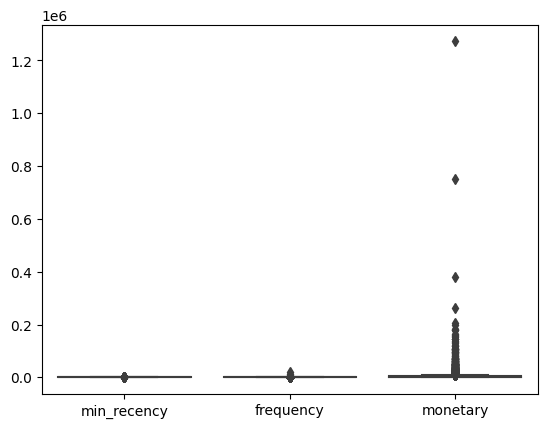

In [33]:
sns.boxplot(data= df_rfm)

<AxesSubplot:xlabel='monetary', ylabel='Count'>

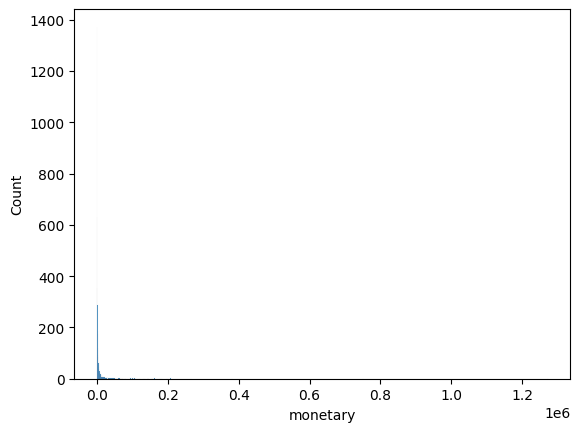

In [32]:
sns.histplot(data= df_rfm, x=  "monetary")

## RFM Skor

In [35]:
df_rfm["Recency_score"] = pd.qcut(df_rfm['min_recency'], 5, labels=[5, 4, 3, 2, 1])
df_rfm["Frequency_score"] = pd.qcut(df_rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df_rfm["Monetary_score"] = pd.qcut(df_rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

df_rfm["RFM_SCORE"] = (df_rfm['Recency_score'].astype(str) + df_rfm['Frequency_score'].astype(str))

df_rfm.head()

,seller_id,min_recency,frequency,monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE
0,A1UIZZ7LFTO1KV,1,12,4539.440,5,3,4,53
1,A3N3AP9DR5TZ9N,1,4,1090.100,5,2,3,52
2,A2NAHPBHVJDIV9,1,53,11602.170,5,5,5,55
3,AJHEHDC6Y12XP,1,31,7344.420,5,4,5,54
4,A7XHISNODKGL8,1,83,5038.250,5,5,5,55


In [36]:
# RFM segmentlerinin oluşturulması
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

# RFM skorlarını isimlendirelim
df_rfm['segment'] = df_rfm['RFM_SCORE'].replace(seg_map, regex=True)

df_rfm.head()

,seller_id,min_recency,frequency,monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,segment
0,A1UIZZ7LFTO1KV,1,12,4539.440,5,3,4,53,potential_loyalists
1,A3N3AP9DR5TZ9N,1,4,1090.100,5,2,3,52,potential_loyalists
2,A2NAHPBHVJDIV9,1,53,11602.170,5,5,5,55,champions
3,AJHEHDC6Y12XP,1,31,7344.420,5,4,5,54,champions
4,A7XHISNODKGL8,1,83,5038.250,5,5,5,55,champions


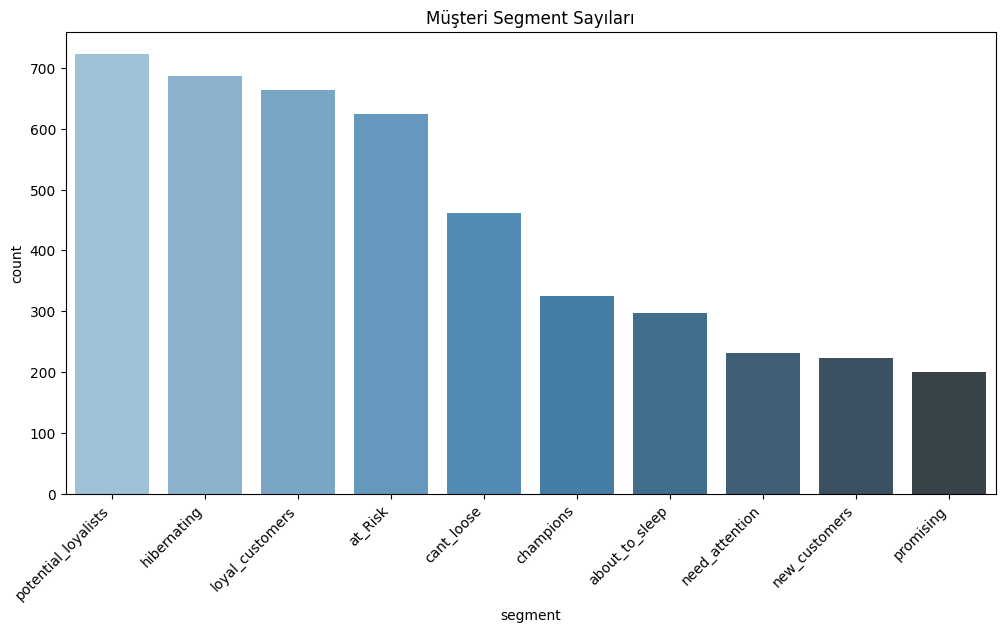

In [45]:
segment_counts = df_rfm['segment'].value_counts().reset_index()


segment_counts.columns = ['segment', 'count']


segment_counts = segment_counts.sort_values(by='count', ascending=False)


palette = sns.color_palette("Blues_d", n_colors=len(segment_counts))


plt.figure(figsize=(12, 6))
sns.countplot(data=df_rfm, x="segment", order=segment_counts['segment'], palette=palette)
plt.xticks(rotation=45, ha='right') 
plt.title('Müşteri Segment Sayıları')
plt.show()

In [46]:
df_rfm.to_excel("rfm_segmentasyon.xlsx", index= False)

In [25]:
df_all = pd.read_csv("all_users.csv")
df_all.sample(10)

,user_id,register_date,suspended_date,fus_to_paid_date,registration_source,cancellation_reason,total_account_count,total_income,total_product_count,total_profit,status
8026,8170,2022-04-01,NaN,NaN,NaN,NaN,0,0,0,0,Active
18943,144876,2023-10-14,NaN,NaN,amazon-camp---september,NaN,1,0,172,0,Active
9923,14433,2022-08-29,2022-10-12,NaN,NaN,NaN,1,980,488,121,Suspended
18350,132633,2023-09-25,NaN,NaN,İnstagramdan,NaN,0,0,0,0,Active
8741,8975,2022-05-28,NaN,NaN,NaN,NaN,0,0,0,0,Active
6479,6616,2022-01-21,2022-05-02,NaN,NaN,NaN,0,0,0,0,Suspended
4933,5058,2021-11-09,NaN,NaN,NaN,NaN,0,0,0,0,Active
16885,111222,2023-08-10,NaN,NaN,facebook,NaN,2,0,0,0,Active
12561,44027,2023-01-22,2023-08-20,NaN,amazon-camp,amazon_suspended,4,2653,970,362,Suspended
7881,8024,2022-03-24,2022-04-07,NaN,NaN,NaN,1,0,0,0,Suspended


In [22]:
df_all["register_date"].min()

'2019-07-13'

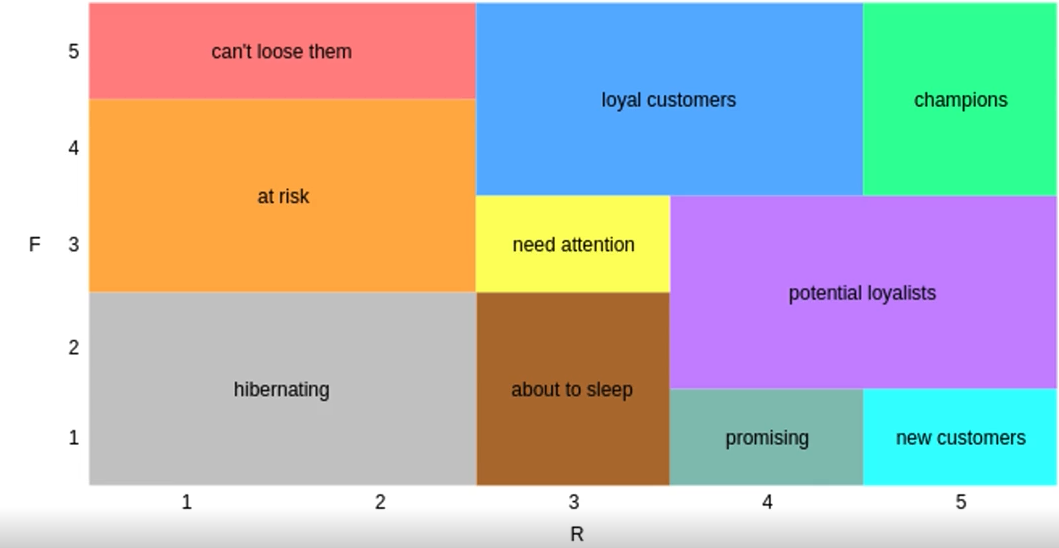